# Numerical handling of schrodinger equation

Consider the following one dimensional schrodinger equation -

$$
\frac{-\hbar^2}{2m} \frac{d^2\Psi(x)}{dx^2} + V(x)\Psi(x) = E\Psi(x)
$$

in range $x \in [a, b]$ with boundary condition $\Psi(x=a)=\Psi_a$, and $\Psi(x=b)=\Psi_b$

- We first descretize the `position' space and define $x_n = a + t n$ where $t = \frac{b - a}{N}$, $N$ being the number of samples. $x_0 = a$, and $x_N = b$

- We approximate the double derivatives using central difference formula

$$
\frac{d^2\Psi}{d x^2}\biggr|_{x=x_n} \approx {\Psi_{n+1} -2 \Psi_{n} + \Psi_{n-1} \over t^2}
$$

We approximate the double derivatives using central difference formula

$$
-\frac{\hbar^2}{2mt^2}\left({\Psi_{n+1} -2 \Psi_{n} + \Psi_{n-1}}\right) + V_n\Psi_n = E\Psi_n
$$

or, rearranging the terms we get

$$
\left(-{\Psi_{n+1} +2 \Psi_{n} - \Psi_{n-1}}\right) + \frac{2mt^2}{\hbar^2}V_n\Psi_n = E\Psi_n
$$

equivalently

$$
-\Psi_{n+1} +(2 + \frac{2mt^2}{\hbar^2}V_n)\Psi_n - \Psi_{n-1} = E\Psi_n
$$

Using $v_n = 2(1 + \frac{mt^2}{\hbar^2})V_n$, we can simplify the recurrance relation as following 
$$
-\Psi_{n+1} + v_n\Psi_{n} -\Psi_{n-1} = E\Psi_n
$$



We approximate the double derivatives using central difference formula



In [17]:
from ast import Del
import numpy as np
import matplotlib.pyplot as plt

# constants

Box_Width = 3.0
Delta = 0.1 * Box_Width
V0 = 30.0

alpha = 1.0
Npoints = 1000

def potential_box(x):
    f = 0.0
    if abs(x) <= Box_Width:
        f = 0.0
    else:
        if abs(x) > Box_Width and abs(x) <= Box_Width + Delta:
            f = V0
        else:
            f = 100 * V0
    #
    return f

def potential_harmonic(x):
    return x**2
#
potential = potential_box
Fvec = np.vectorize(potential)

xi, dx = np.linspace(-Box_Width - Delta, Box_Width + Delta, Npoints, retstep=True)

In [18]:
Vi = Fvec(xi)
vi = 2 * (1 + alpha * dx**2 * Vi)
Psi = np.zeros(xi.shape)

In [19]:
def get_matrix(vi):
    n = vi.shape[0]
    mat = np.zeros((n, n))
    for i in range(1, n):
        mat[i, i - 1] = -1
        mat[i-1, i] = -1
    #
    np.fill_diagonal(mat, vi)
    return mat
#

M = get_matrix(vi)
eig, vecs = np.linalg.eigh(M)


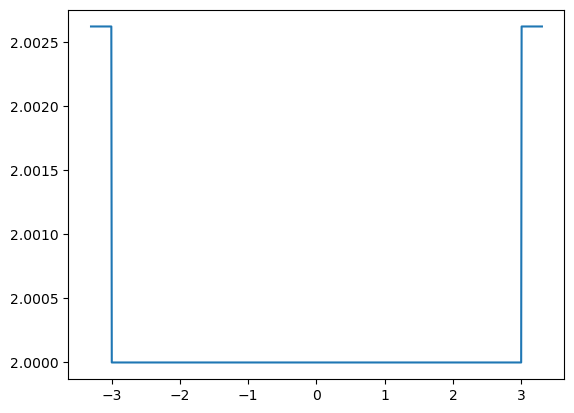

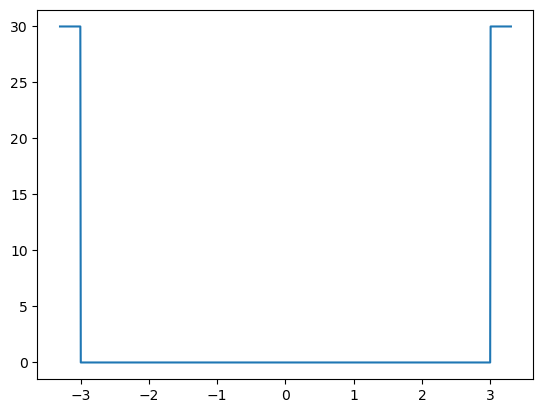

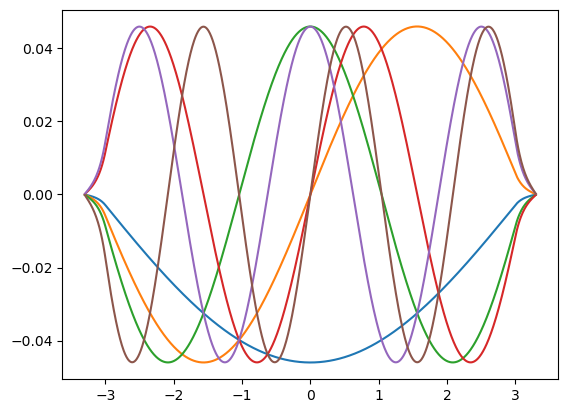

In [20]:
plt.plot(xi, vi)
plt.show()

plt.plot(xi, Vi)
plt.show()
for i in range(6):
    plt.plot(xi, vecs[:, i])
#plt.plot(vecs[0])
plt.show()

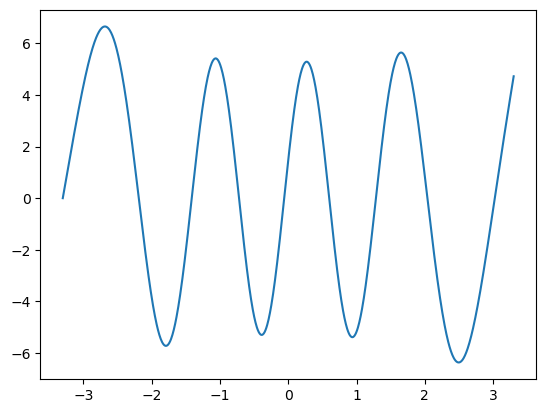

In [18]:
def boundary(E):
    Psi[1] = 0.0001
    for i in range(2, Npoints):
        Psi[i] = 2 * Psi[i-1] - (1.0 - alpha * Vi[i-2]) * Psi[i-2] - alpha * E * Psi[i-2]
    return Psi[-1]
#


Psi[0] = 0
Psi[1] = 0.1
E = 0.001
for i in range(2, Npoints):
    Psi[i] =   (2 * (1+dx**2 * Vi[i-1]) - E) * Psi[i-1] - Psi[i-2]
#
plt.plot(xi, Psi, '-')

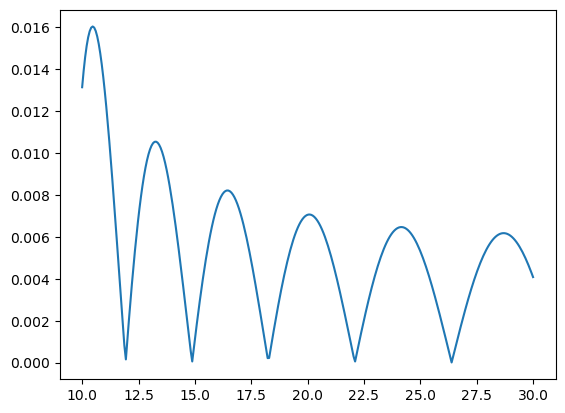

In [26]:
Es = np.linspace(10, 30, 300)
B = [boundary(e) for e in Es]
plt.plot(Es, np.abs(B))